✅ Dataset Overview

Entries: 33 rows

Columns: 9 total

Time range: Looks like ~2014–2023 (10 years × ~3–4 countries actually returned → 33 rows).

Columns:

Country (string)

Year (int)

Indicators: Net_migration, GDP_per_capita, Unemployment_rate, Inflation, Population_total, Poverty_rate, Health_expenditure_pctGDP

In [2]:
!pip install wbdata --quiet


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\lenavo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import wbdata as wb
import pandas as pd
import datetime 

Get the different datasets (sources) available from the World Bank API

In [4]:
wb.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Findex database
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Global P

Getting indicators from World Development Indicators  (source=2)

In [5]:
# Get indicators from World Development Indicators (source = 2)
all_indicators = wb.get_indicators(source=2)
all_indicators

id                          name
--------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------
AG.CON.FERT.PT.ZS           Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS              Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2              Agricultural land (sq. km)
AG.LND.AGRI.ZS              Agricultural land (% of land area)
AG.LND.ARBL.HA              Arable land (hectares)
AG.LND.ARBL.HA.PC           Arable land (hectares per person)
AG.LND.ARBL.ZS              Arable land (% of land area)
AG.LND.CREL.HA              Land under cereal production (hectares)
AG.LND.CROP.ZS              Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2           Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS           Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2  

In [6]:
# Get all indicators
inds = wb.get_indicators()

# Filter for those containing "remittances" (case-insensitive)
remittance_inds = [i for i in inds if "remittance" in i['name'].lower()]

# Print results
for ind in remittance_inds:
    print(ind['id'], ":", ind['name'])


BM.TRF.MGR.CD : Migrant remittance outflows (current US$)
BM.TRF.PWKR.CD : Workers' remittances, payments (BoP, current US$)
BM.TRF.PWKR.CD.DT : Personal remittances, paid (current US$)
BN.TRF.PWKR.CD : Workers' remittances, net (BoP, current US$)
BN.TRF.PWKR.CD.DT : Personal remittances, net (current US$)
BX.GSR.INCL.CD : Exports of goods, services, income and workers' remittances (BoP, current US$)
BX.TRF.MGR.CD : Migrant remittance inflows (current US$)
BX.TRF.MGR.DT.GD.ZS : Migrant remittance inflows (% of GDP)
BX.TRF.PWKR.CD.DT : Personal remittances, received (current US$)
BX.TRF.PWKR.DT.GD.ZS : Personal remittances, received (% of GDP)
BX.TRF.PWKR.GD.ZS : Workers' remittances, receipts (% of GDP)
fh1 : Sent domestic remittances  (% age 15+)
fh1.1 : Sent domestic remittances, women (% age 15+)
fh1.10 : Sent domestic remittances, urban (% age 15+)
fh1.11 : Sent domestic remittances, out of laborforce (% age 15+)
fh1.12 : Sent domestic remittances, in laborforce (% age 15+)
fh1.2 :

In [7]:

countries = ["PK", "IN", "BD"]
start_date = datetime.datetime(2014, 1, 1)
end_date   = datetime.datetime(2024, 1, 1)

indicator = { 
    "SM.POP.NETM": "Net_migration",
    "NY.GDP.PCAP.CD": "GDP_per_capita",
    "SL.UEM.TOTL.ZS": "Unemployment_rate",
     "FP.CPI.TOTL.ZG": "Inflation",
    "SP.POP.TOTL": "Population_total",
    "SI.POV.DDAY": "Poverty_rate",
    "SH.XPD.CHEX.GD.ZS": "Health_expenditure_pctGDP",
    
   
}

df = wb.get_dataframe(
    indicators=indicator,
    country=countries,
    date=(start_date, end_date)
)

print(df.head())


                 Net_migration  GDP_per_capita  Unemployment_rate  Inflation  \
country    date                                                                
Bangladesh 2024      -473362.0     2593.416074              4.680  10.465748   
           2023      -549918.0     2551.017738              4.454   9.883503   
           2022      -549990.0     2716.485928              4.593   7.696954   
           2021      -994722.0     2482.849178              5.327   5.545654   
           2020     -1002522.0     2248.850788              5.436   5.691075   

                 Population_total  Poverty_rate  Health_expenditure_pctGDP  
country    date                                                             
Bangladesh 2024       173562364.0           NaN                        NaN  
           2023       171466990.0           NaN                        NaN  
           2022       169384897.0           8.0                   2.390386  
           2021       167658854.0           NaN       

fetch data

In [8]:
data=wb.get_dataframe(indicators=indicator,country=countries,date=(start_date,end_date))

Reset index for better visualization

In [9]:
data.reset_index(inplace=True)

Rename columns

In [10]:
data.rename(columns={'country':'Country','date':'Year'},inplace=True)

save a file to csv

In [11]:
data.to_csv('migration_data.csv',index=False)

In [12]:
df=data.copy()

# EDA

In [13]:
df.head(10)

,Country,Year,Net_migration,GDP_per_capita,Unemployment_rate,Inflation,Population_total,Poverty_rate,Health_expenditure_pctGDP
0,Bangladesh,2024,-473362.0,2593.416074,4.680,10.465748,173562364.0,NaN,NaN
1,Bangladesh,2023,-549918.0,2551.017738,4.454,9.883503,171466990.0,NaN,NaN
2,Bangladesh,2022,-549990.0,2716.485928,4.593,7.696954,169384897.0,8.0,2.390386
3,Bangladesh,2021,-994722.0,2482.849178,5.327,5.545654,167658854.0,NaN,2.365513
4,Bangladesh,2020,-1002522.0,2248.850788,5.436,5.691075,166298024.0,NaN,2.270639
5,Bangladesh,2019,-1016796.0,2129.798970,4.441,5.591996,164913055.0,NaN,2.257622
6,Bangladesh,2018,-1029069.0,1965.243727,4.407,5.543621,163523103.0,NaN,2.316222
7,Bangladesh,2017,-1037176.0,1811.082217,4.372,5.702070,162186147.0,NaN,2.367202
8,Bangladesh,2016,-918770.0,1649.283809,4.350,5.513526,160811932.0,19.5,2.389382
9,Bangladesh,2015,-909223.0,1224.386477,4.396,6.194280,159383179.0,NaN,2.272177


In [14]:
df.sample(5)

,Country,Year,Net_migration,GDP_per_capita,Unemployment_rate,Inflation,Population_total,Poverty_rate,Health_expenditure_pctGDP
6,Bangladesh,2018,-1029069.0,1965.243727,4.407,5.543621,1.635231e+08,NaN,2.316222
16,India,2019,-978969.0,2041.428637,6.510,3.729506,1.389030e+09,NaN,2.952998
2,Bangladesh,2022,-549990.0,2716.485928,4.593,7.696954,1.693849e+08,8.0,2.390386
4,Bangladesh,2020,-1002522.0,2248.850788,5.436,5.691075,1.662980e+08,NaN,2.270639
9,Bangladesh,2015,-909223.0,1224.386477,4.396,6.194280,1.593832e+08,NaN,2.272177


In [15]:
df.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    33 non-null     object 
 1   Year                       33 non-null     object 
 2   Net_migration              33 non-null     float64
 3   GDP_per_capita             33 non-null     float64
 4   Unemployment_rate          33 non-null     float64
 5   Inflation                  33 non-null     float64
 6   Population_total           33 non-null     float64
 7   Poverty_rate               5 non-null      float64
 8   Health_expenditure_pctGDP  27 non-null     float64
dtypes: float64(7), object(2)
memory usage: 2.4+ KB


In [16]:
df["Country"].nunique()

3

In [17]:
df["Country"].unique()

array(['Bangladesh', 'India', 'Pakistan'], dtype=object)

In [18]:
df["Country"].value_counts()

Country
Bangladesh    11
India         11
Pakistan      11
Name: count, dtype: int64

In [19]:
df["Year"].unique()

array(['2024', '2023', '2022', '2021', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014'], dtype=object)

In [20]:
df["Year"] = df["Year"].astype(int)

In [21]:
df.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    33 non-null     object 
 1   Year                       33 non-null     int64  
 2   Net_migration              33 non-null     float64
 3   GDP_per_capita             33 non-null     float64
 4   Unemployment_rate          33 non-null     float64
 5   Inflation                  33 non-null     float64
 6   Population_total           33 non-null     float64
 7   Poverty_rate               5 non-null      float64
 8   Health_expenditure_pctGDP  27 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.4+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,33.0,2.019000e+03,3.211308e+00,2.014000e+03,2.016000e+03,2.019000e+03,2.022000e+03,2.024000e+03
Net_migration,33.0,-9.517792e+05,5.700400e+05,-2.290411e+06,-1.309611e+06,-9.789690e+05,-5.592910e+05,8.124800e+04
GDP_per_capita,33.0,1.838293e+03,4.794391e+02,1.094462e+03,1.455319e+03,1.707509e+03,2.239614e+03,2.716486e+03
Unemployment_rate,33.0,5.200879e+00,1.555152e+00,1.827000e+00,4.372000e+00,4.822000e+00,6.338000e+00,7.859000e+00
Inflation,33.0,7.488783e+00,5.329748e+00,2.529328e+00,4.953036e+00,5.691075e+00,7.696954e+00,3.076813e+01
Population_total,33.0,5.941106e+08,5.694609e+08,1.579649e+08,1.693849e+08,2.308009e+08,1.343944e+09,1.450936e+09
Poverty_rate,5.0,1.324000e+01,6.199032e+00,5.300000e+00,8.000000e+00,1.650000e+01,1.690000e+01,1.950000e+01
Health_expenditure_pctGDP,27.0,2.786407e+00,4.418590e-01,2.257622e+00,2.378292e+00,2.828449e+00,2.971578e+00,3.619565e+00


In [23]:
df.groupby("Country").describe().T


Country                           Bangladesh        India     Pakistan
Year                      count    11.000000    11.000000    11.000000
                          mean   2019.000000  2019.000000  2019.000000
                          std       3.316625     3.316625     3.316625
                          min    2014.000000  2014.000000  2014.000000
                          25%    2016.500000  2016.500000  2016.500000
...                                      ...          ...          ...
Health_expenditure_pctGDP min       2.257622     2.858494     2.488991
                          25%       2.272177     2.952998     2.570264
                          50%       2.316222     3.341461     2.828449
                          75%       2.367202     3.504304     2.904341
                          max       2.390386     3.619565     2.990158

[64 rows x 3 columns]

CHECK MISSING VALUES VISUALLY

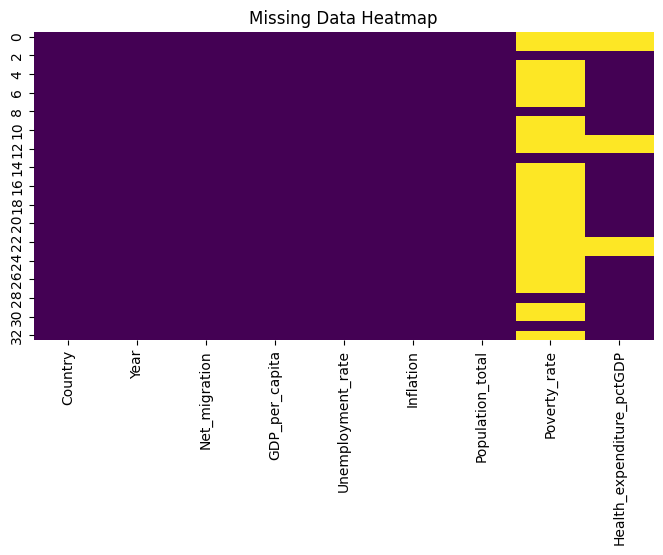

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


In [25]:
df.isnull().sum()

Country                       0
Year                          0
Net_migration                 0
GDP_per_capita                0
Unemployment_rate             0
Inflation                     0
Population_total              0
Poverty_rate                 28
Health_expenditure_pctGDP     6
dtype: int64

In [26]:
# percentage of missing values
missing_per=(df.isnull().sum() / len(df)) * 100
missing_per

Country                       0.000000
Year                          0.000000
Net_migration                 0.000000
GDP_per_capita                0.000000
Unemployment_rate             0.000000
Inflation                     0.000000
Population_total              0.000000
Poverty_rate                 84.848485
Health_expenditure_pctGDP    18.181818
dtype: float64

In [27]:
# poverty rate has the highest missing values,dropping it
df.drop(columns=['Poverty_rate'],inplace=True)  

In [28]:
# filling health expenditure missing values with mean
df['Health_expenditure_pctGDP'].fillna(df['Health_expenditure_pctGDP'].mean(),inplace=True)

C:\Users\lenavo\AppData\Local\Temp\ipykernel_40188\4220334033.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Health_expenditure_pctGDP'].fillna(df['Health_expenditure_pctGDP'].mean(),inplace=True)


In [29]:
df.isnull().sum()

Country                      0
Year                         0
Net_migration                0
GDP_per_capita               0
Unemployment_rate            0
Inflation                    0
Population_total             0
Health_expenditure_pctGDP    0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

# DISTRIBUTION ANALYSIS

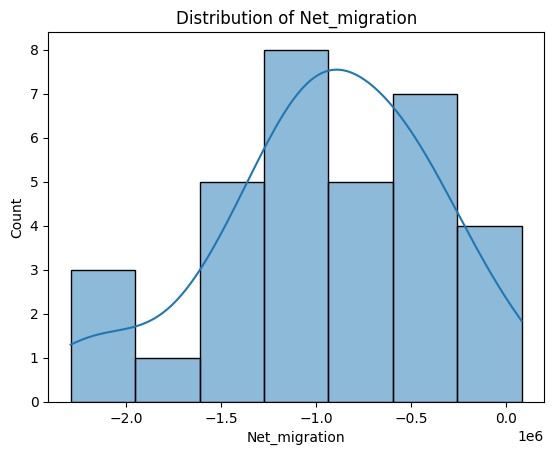

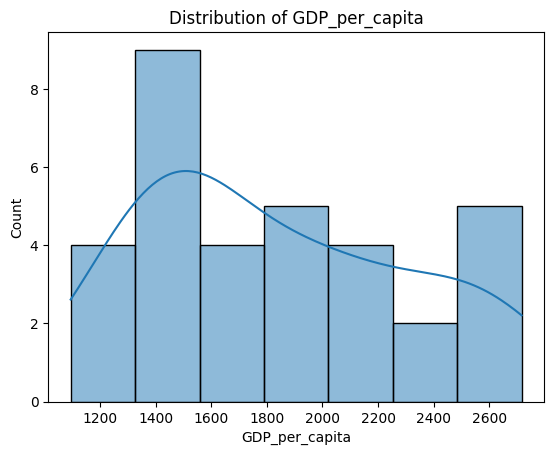

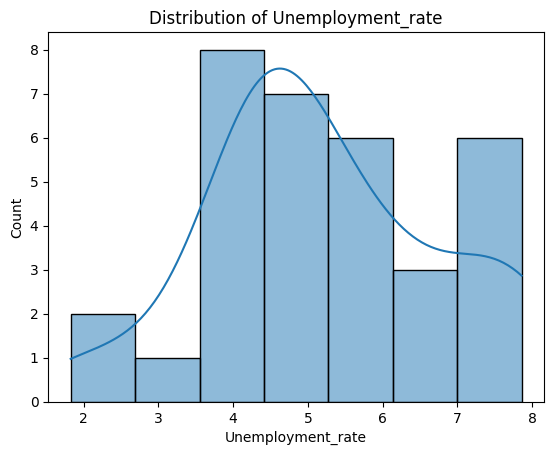

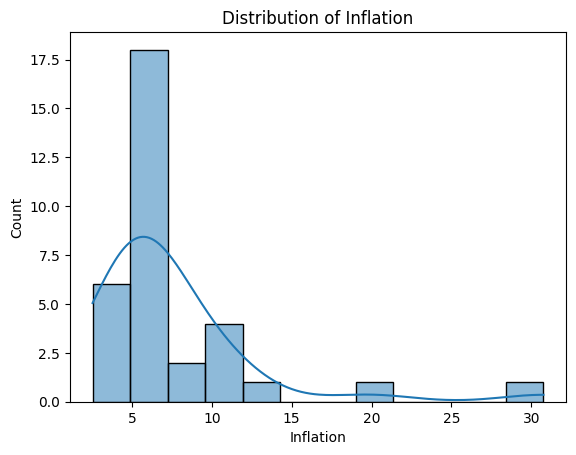

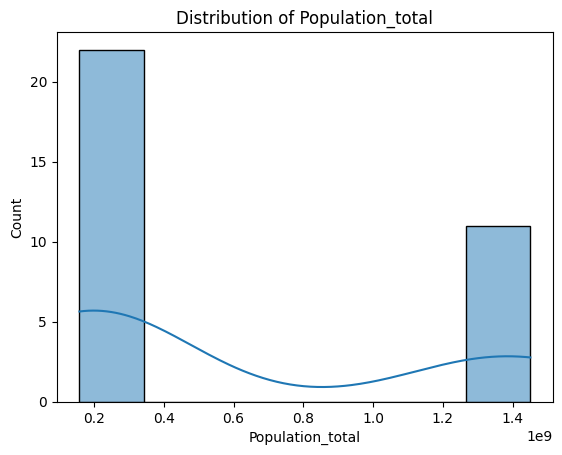

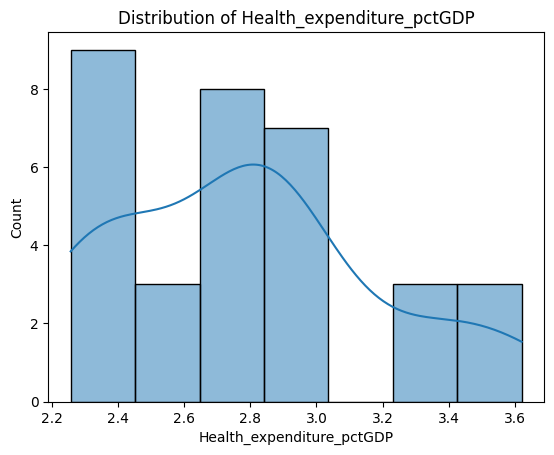

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ["Net_migration","GDP_per_capita","Unemployment_rate",
            "Inflation","Population_total","Health_expenditure_pctGDP"]:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


# Migration vs key predictors

PAIRPLOT

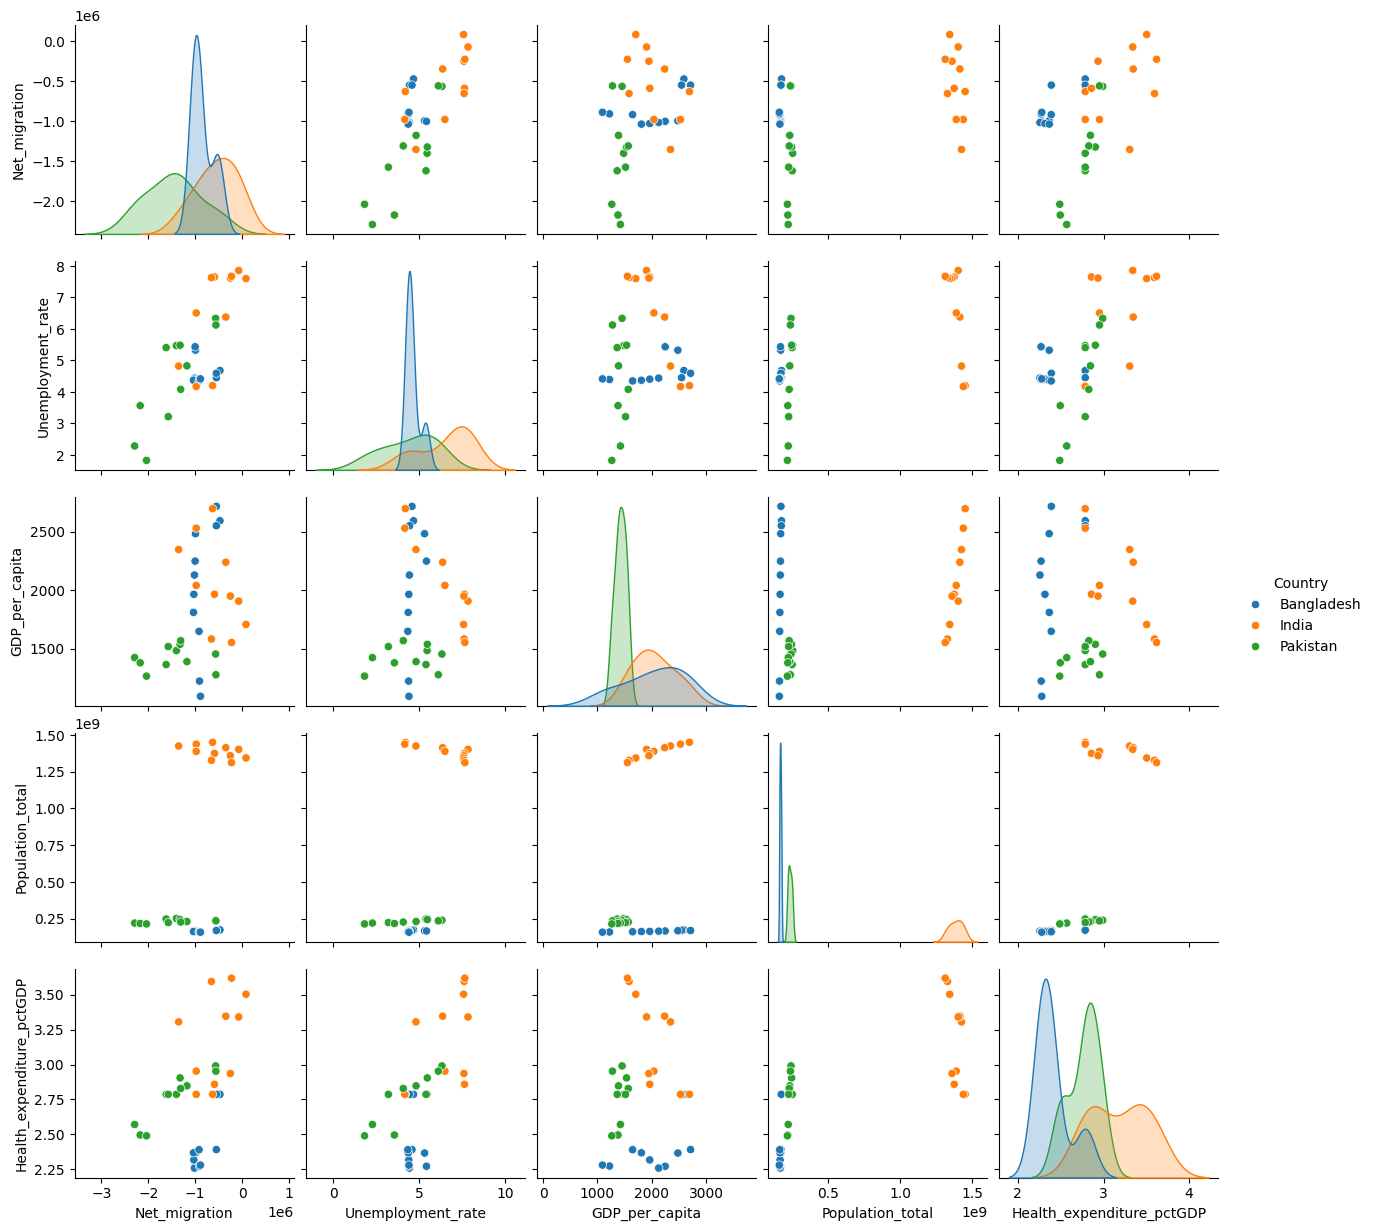

In [33]:
sns.pairplot(df, vars=["Net_migration","Unemployment_rate","GDP_per_capita","Population_total","Health_expenditure_pctGDP"], hue="Country")
plt.show()

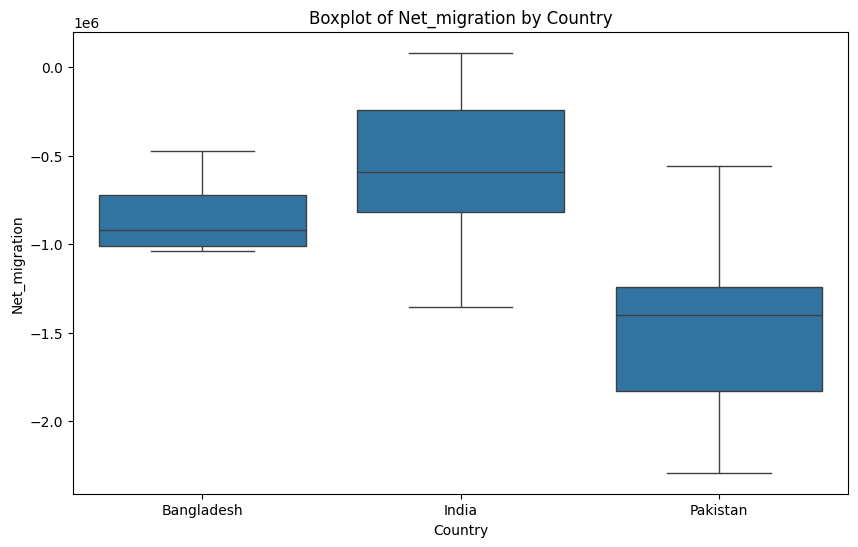

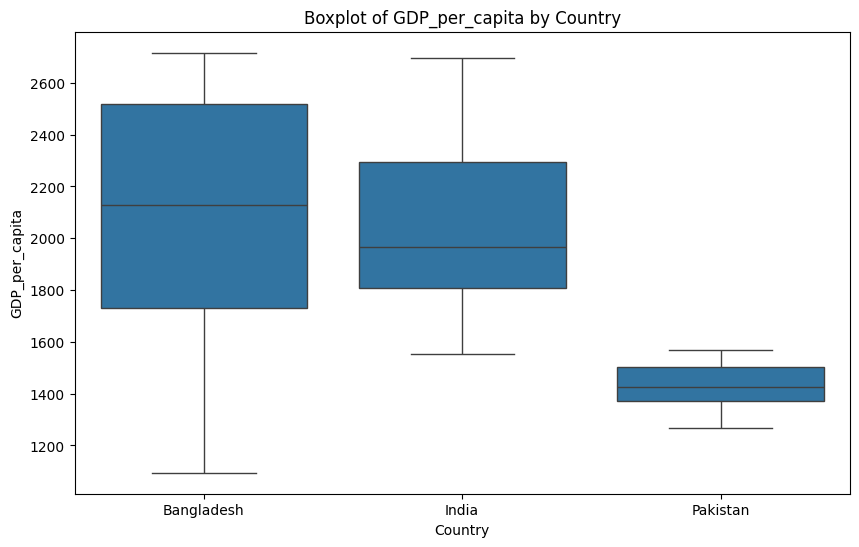

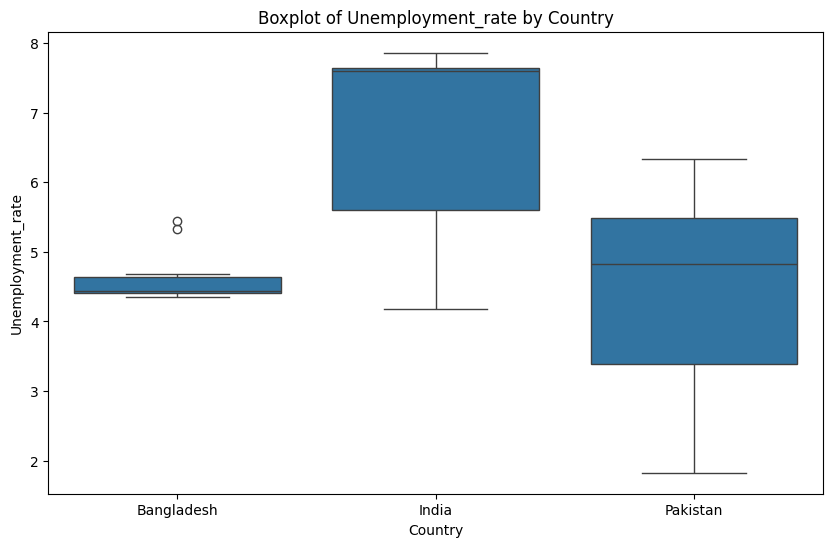

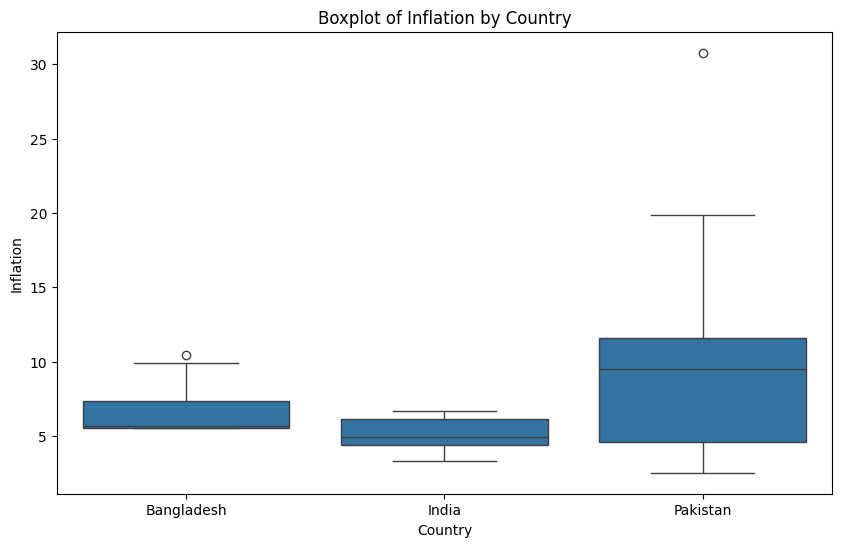

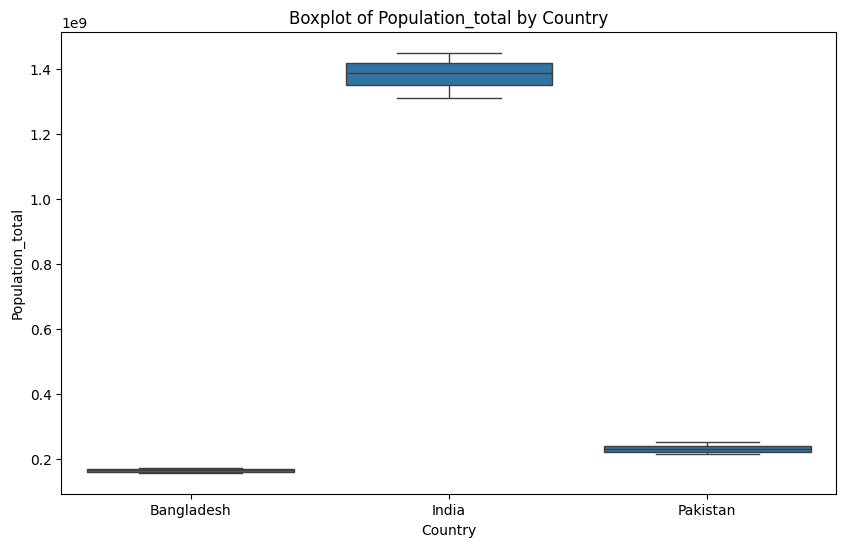

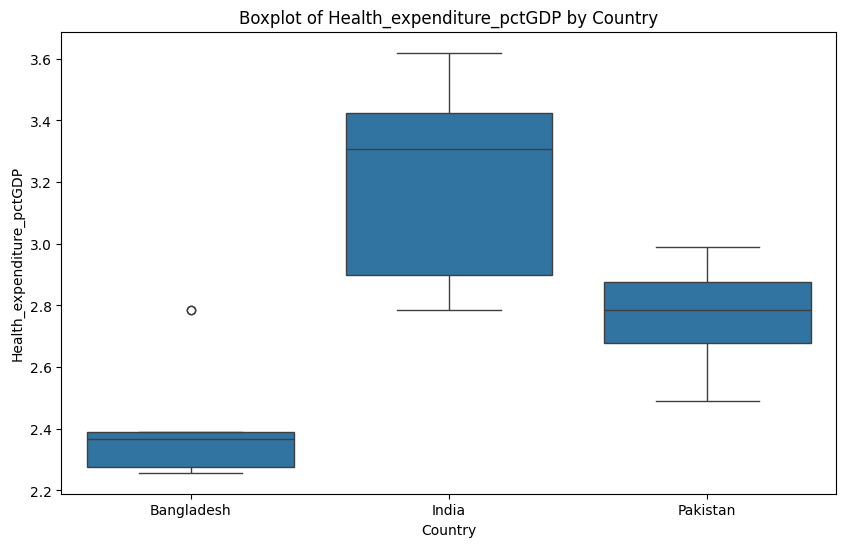

In [34]:
for col in df.columns:
    if col not in ["Country","Year"]:
        plt.figure(figsize=(10,6))
        sns.boxplot(x="Country", y=col, data=df)
        plt.title(f"Boxplot of {col} by Country")
        plt.show()          

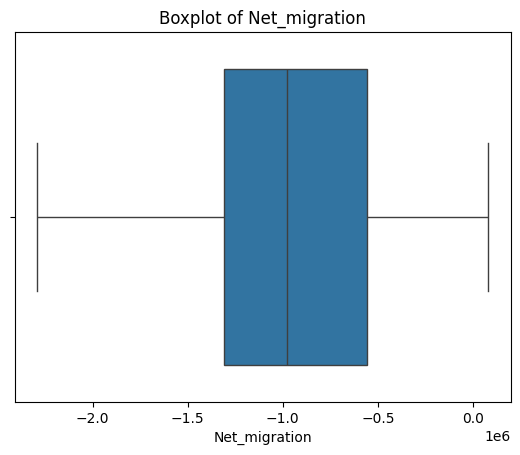

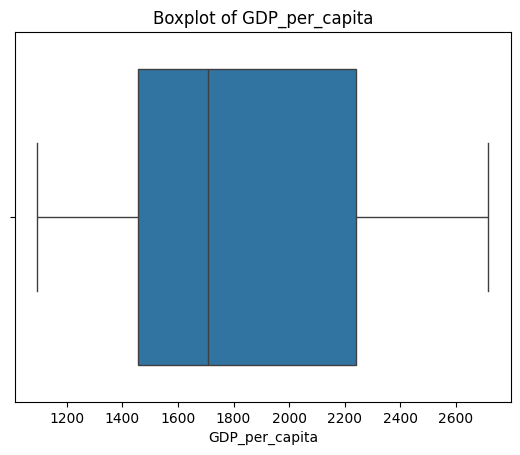

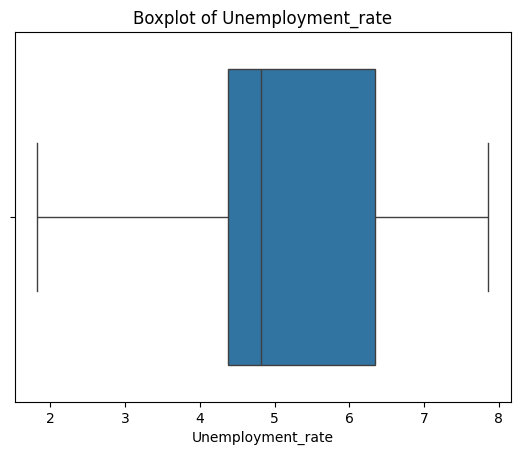

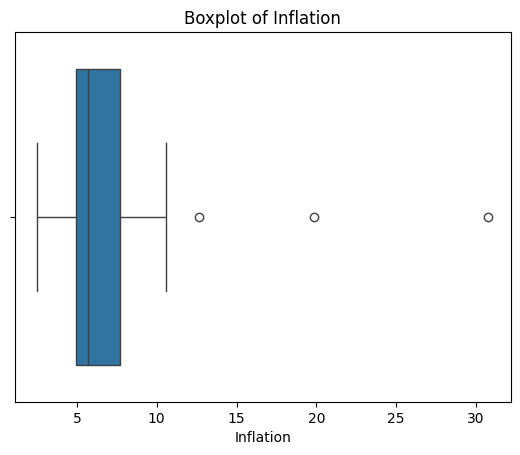

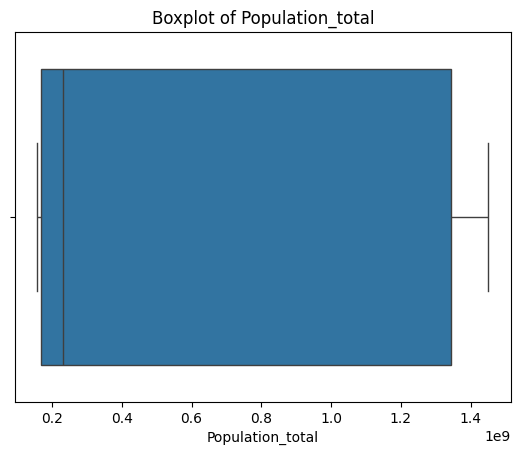

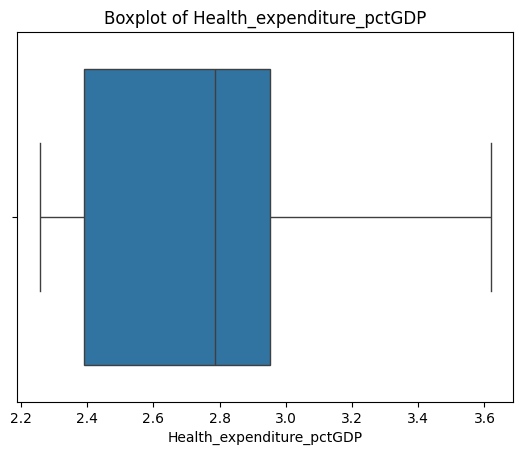

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ["Net_migration","GDP_per_capita","Unemployment_rate",
            "Inflation","Population_total","Health_expenditure_pctGDP"]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# NET MIGRATION

Text(0.5, 0, 'Net Migration')

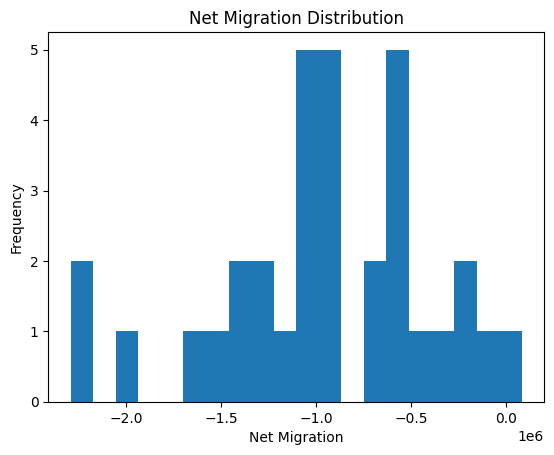

In [36]:
df["Net_migration"].plot(kind="hist", bins=20, title="Net Migration Distribution")
plt.xlabel("Net Migration")

# FEATURE ENGINEERING

# MIGRATION RATE PER 1000

In [37]:
# Create migration rate per 1000 people
df["Migration_rate_per_1000"] = (df["Net_migration"] / df["Population_total"]) * 1000

# Quick check
df.head(2)

,Country,Year,Net_migration,GDP_per_capita,Unemployment_rate,Inflation,Population_total,Health_expenditure_pctGDP,Migration_rate_per_1000
0,Bangladesh,2024,-473362.0,2593.416074,4.680,10.465748,173562364.0,2.786407,-2.727331
1,Bangladesh,2023,-549918.0,2551.017738,4.454,9.883503,171466990.0,2.786407,-3.207136


# COUNTRY

migration trends over years by country

Text(0.5, 1.0, 'Net Migration Over Years by Country')

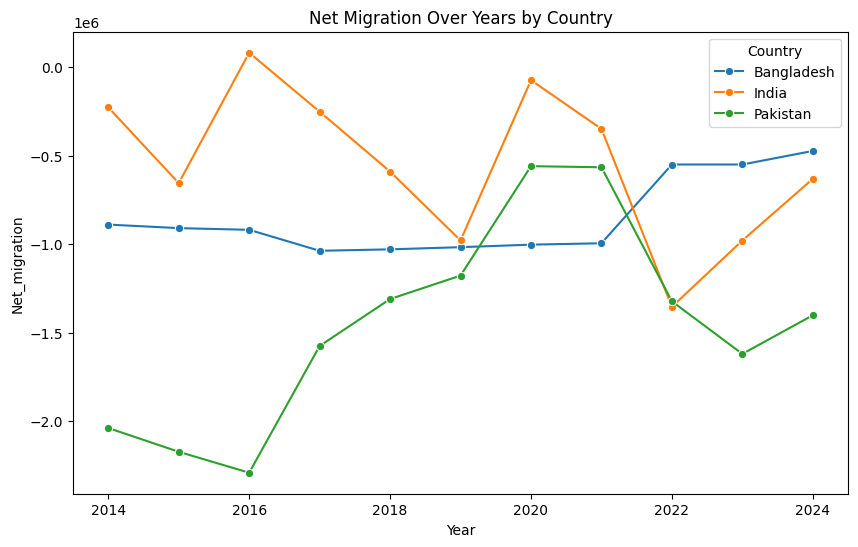

In [38]:
#plot net migration vs years
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Year", y="Net_migration", hue="Country", marker="o")
plt.title("Net Migration Over Years by Country")

In [39]:
# Calculate mean migration rate per 1000 by country
avg_migration = (
    df.groupby("Country")["Migration_rate_per_1000"]
      .mean()
      .reset_index()
      .sort_values(by="Migration_rate_per_1000")
)
avg_migration

,Country,Migration_rate_per_1000
2,Pakistan,-6.375025
0,Bangladesh,-5.185805
1,India,-0.389951


C:\Users\lenavo\AppData\Local\Temp\ipykernel_40188\403510465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


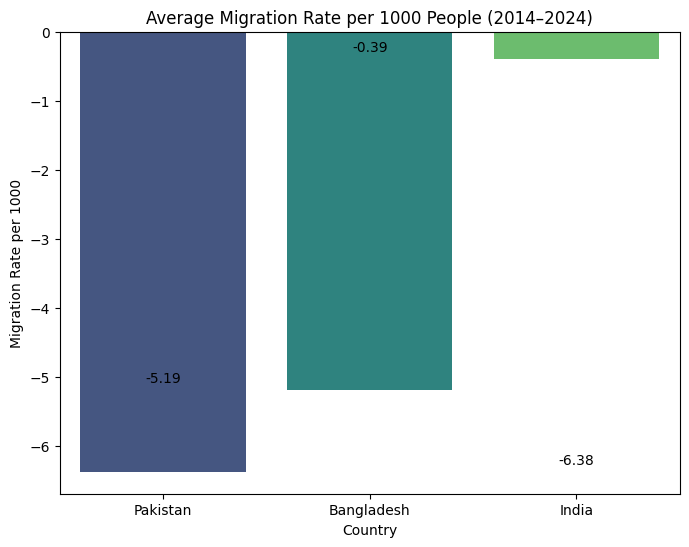

In [40]:
# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    data=avg_migration,
    x="Country",
    y="Migration_rate_per_1000",
    palette="viridis"
)

plt.title("Average Migration Rate per 1000 People (2014–2024)")
plt.ylabel("Migration Rate per 1000")
plt.xlabel("Country")

# Annotate values on bars
for i, row in avg_migration.iterrows():
    plt.text(i, row["Migration_rate_per_1000"] + 0.1, f"{row['Migration_rate_per_1000']:.2f}", 
             ha='center', fontsize=10)

plt.show()


In [41]:
df.columns

Index(['Country', 'Year', 'Net_migration', 'GDP_per_capita',
       'Unemployment_rate', 'Inflation', 'Population_total',
       'Health_expenditure_pctGDP', 'Migration_rate_per_1000'],
      dtype='object')

# POPULATION

In [42]:
import plotly.express as px
fig=px.line(df,
        x="Year",
        y="Population_total",
        color="Country",
        log_y=True,
        title="Total Population Over Years by Country")

fig.update_layout(width=800, height=500)
fig.show()

In [43]:
# Calculate mean population by country
avg_population = (
    df.groupby("Country")["Population_total"]
      .mean()
      .reset_index()
      .sort_values(by="Population_total")
)
avg_population

,Country,Population_total
0,Bangladesh,1.651958e+08
2,Pakistan,2.317865e+08
1,India,1.385349e+09


C:\Users\lenavo\AppData\Local\Temp\ipykernel_40188\360596139.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




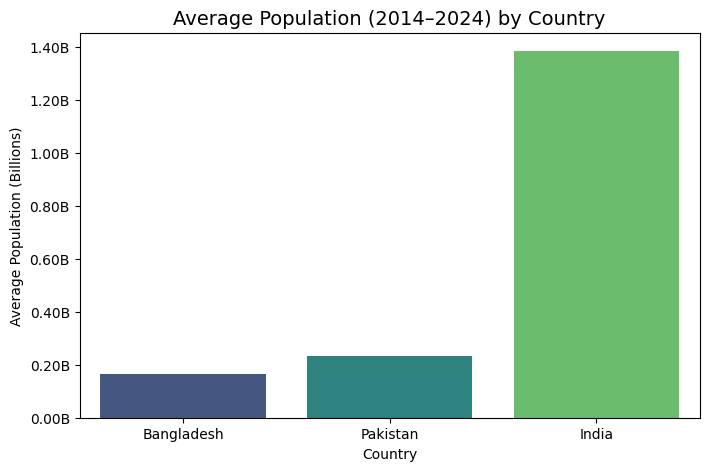

In [44]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=avg_population,
    x="Country",
    y="Population_total",
    palette="viridis"
)

plt.title("Average Population (2014–2024) by Country", fontsize=14)
plt.ylabel("Average Population (Billions)")
plt.xlabel("Country")

# Format y-axis in billions
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x/1e9:.2f}B')
)

plt.show()

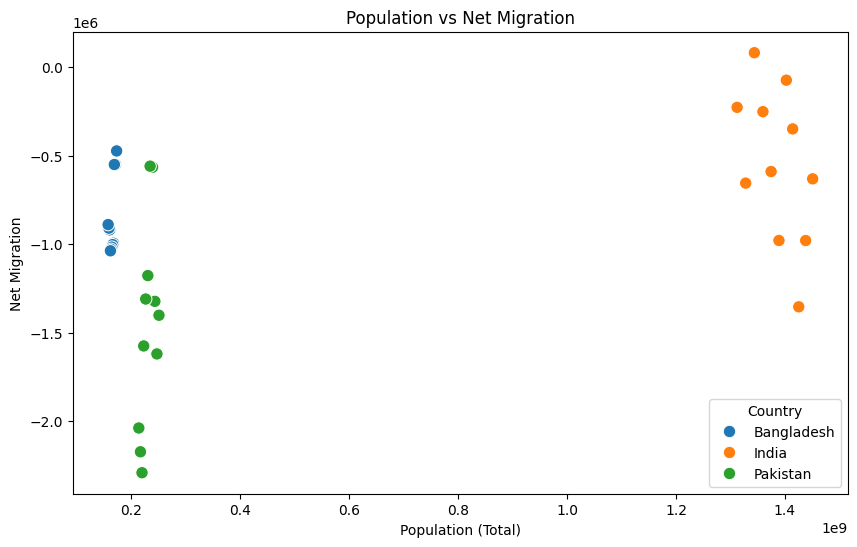

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Population_total", y="Net_migration", hue="Country", s=80)
plt.title("Population vs Net Migration")
plt.xlabel("Population (Total)")
plt.ylabel("Net Migration")

plt.legend(title="Country", loc="lower right")

plt.show()


# UNEMPLOYMENT

Net migration vs Unemployment rate by country

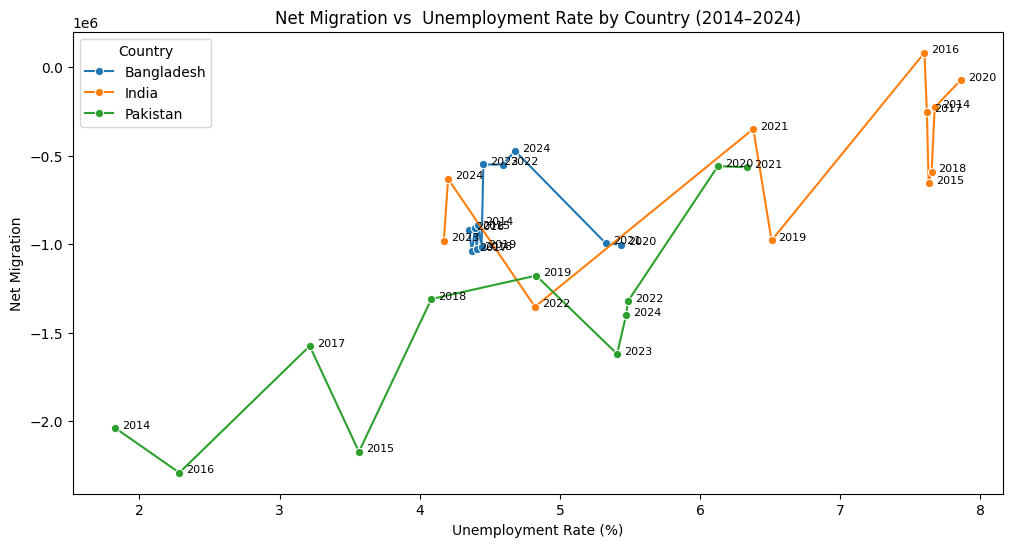

In [46]:
plt.figure(figsize=(12,6))

# Scatter/line plot
sns.lineplot(
    data=df,
    x="Unemployment_rate",
    y="Net_migration",
    hue="Country",
    marker="o"
)

# Annotate years
for _, row in df.iterrows():
    plt.text(
        row["Unemployment_rate"] + 0.05,  # small horizontal shift
        row["Net_migration"],
        str(row["Year"]),
        fontsize=8
    )

plt.title("Net Migration vs  Unemployment Rate by Country (2014–2024)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Net Migration")
plt.legend(title="Country")
plt.show()


In [47]:
import plotly.express as px

fig = px.scatter(
    df,
    x="Unemployment_rate",
    y="Net_migration",
    color="Country",
    facet_col="Country",   # Facet by country
    text="Year",           # Annotate with years
    trendline="ols",       # Adds regression line per facet
    height=500,
    width=1000
)

fig.update_traces(marker=dict(size=8), textposition="top center")

fig.update_layout(
    title="Net Migration vs Unemployment Rate by Country (2014–2024)",
    xaxis_title="Unemployment Rate (%)",
    yaxis_title="Net Migration",
    legend_title="Country"
)

fig.show()


# GDP 
GDP stands for Gross Domestic Product.

It is the total monetary value of all final goods and services produced within a country’s borders in a given time period (usually a year or a quarter).

GDP is one of the most important indicators used to measure the size and health of an economy.

# GDP PER CAPITA
GDP per capita means Gross Domestic Product per person.

It shows the average economic output (or income) per person.
A higher GDP per capita usually suggests a higher standard of living (though it doesn’t measure inequality).

It allows us to compare living standards between countries, regardless of their population size.

<Axes: xlabel='GDP_per_capita', ylabel='Net_migration'>

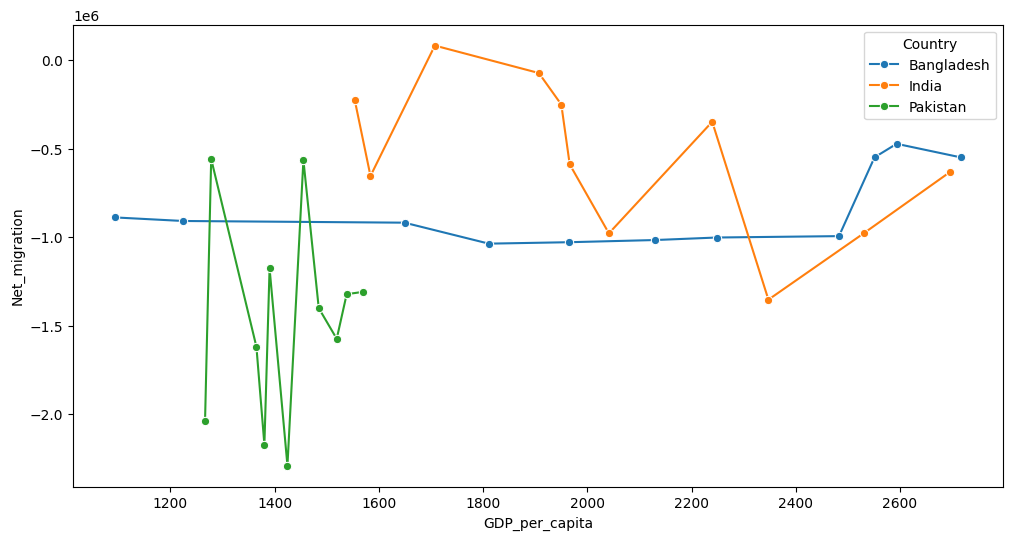

In [48]:
# migration vs gdp per capita
# line graph
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df,
    x="GDP_per_capita",
    y="Net_migration",
    hue="Country",
    marker="o"
)

# INFLATION

### Net Migration vs Inflation by Country (2014–2024)

In [49]:
fig = px.scatter(
    df,
    x="Inflation",
    y="Net_migration",
    color="Country",
    facet_col="Country",   # Separate plot per country      
    trendline="ols",  # Add regression line
    text="Year",#annotate each point with Year
    height=500,
    width=1000
)

fig.update_traces(marker=dict(size=8), textposition="top center")

fig.update_layout(
    title="Net Migration vs Inflation by Country (2014–2024)",
    xaxis_title="Inflation (%)",
    yaxis_title="Net Migration",
    legend_title="Country"
)

fig.show()


In [50]:
df.columns

Index(['Country', 'Year', 'Net_migration', 'GDP_per_capita',
       'Unemployment_rate', 'Inflation', 'Population_total',
       'Health_expenditure_pctGDP', 'Migration_rate_per_1000'],
      dtype='object')

# Health_expenditure_pctGDP

Health expenditure as a percentage of GDP

It measures how much of a country’s Gross Domestic Product (GDP) is spent on healthcare (both public and private spending).

Shows the priority a country gives to healthcare.

Higher percentages often indicate stronger investment in hospitals, medicines, health staff, etc.

### Migration vs Health Expenditure (% of GDP) by Country (2014–2024)

In [51]:
fig = px.scatter(
    df,
    x="Health_expenditure_pctGDP",
    y="Net_migration",
    color="Country",
    facet_col="Country",   # separate panel per country
    text="Year",           # label each point with year
    trendline="ols",       # regression line
    height=500,
    width=1000
)

fig.update_traces(marker=dict(size=8), textposition="top center")

fig.update_layout(
    title="Migration vs Health Expenditure (% of GDP) by Country (2014–2024)",
    xaxis_title="Health Expenditure (% of GDP)",
    yaxis_title="Net Migration",
    legend_title="Country"
)

fig.show()


### Migration rate per 1000 vs Health Expenditure (% of GDP) by Country (2014–2024)


In [52]:
fig = px.scatter(
    df,
    x="Health_expenditure_pctGDP",
    y="Migration_rate_per_1000",
    color="Country",
    facet_col="Country",   # separate panel per country
    text="Year",           # label each point with year
    trendline="ols",       # regression line
    height=500,
    width=1000
)

fig.update_traces(marker=dict(size=8), textposition="top center")

fig.update_layout(
    title="Migration rate per 1000 vs Health Expenditure (% of GDP) by Country (2014–2024)",
    xaxis_title="Health Expenditure (% of GDP)",
    yaxis_title="Migration rate",
    legend_title="Country"
)

fig.show()


In [53]:
df.columns

Index(['Country', 'Year', 'Net_migration', 'GDP_per_capita',
       'Unemployment_rate', 'Inflation', 'Population_total',
       'Health_expenditure_pctGDP', 'Migration_rate_per_1000'],
      dtype='object')

### correlation heatmap

In [55]:
df.corr(numeric_only=True)

,Year,Net_migration,GDP_per_capita,Unemployment_rate,Inflation,Population_total,Health_expenditure_pctGDP,Migration_rate_per_1000
Year,1.000000,0.145156,0.619461,0.043182,0.453614,0.035848,0.049868,0.276778
Net_migration,0.145156,1.000000,0.371745,0.755085,-0.153601,0.483552,0.453202,0.836956
GDP_per_capita,0.619461,0.371745,1.000000,0.063554,-0.203354,0.308986,-0.010923,0.429164
Unemployment_rate,0.043182,0.755085,0.063554,1.000000,0.027864,0.608188,0.668223,0.776114
Inflation,0.453614,-0.153601,-0.203354,0.027864,1.000000,-0.291781,0.035140,-0.134895
Population_total,0.035848,0.483552,0.308986,0.608188,-0.291781,1.000000,0.725058,0.814812
Health_expenditure_pctGDP,0.049868,0.453202,-0.010923,0.668223,0.035140,0.725058,1.000000,0.709451
Migration_rate_per_1000,0.276778,0.836956,0.429164,0.776114,-0.134895,0.814812,0.709451,1.000000


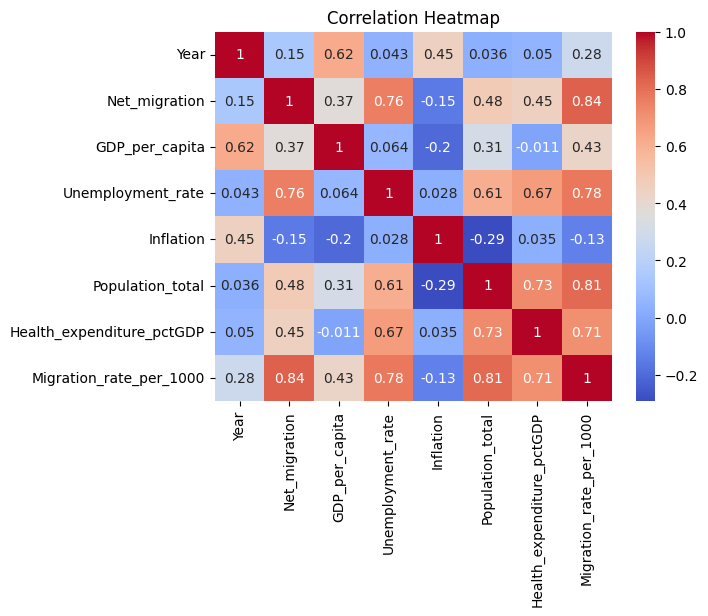

In [54]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()